In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load Dataset
df = pd.read_csv('TASK-ML-INTERN.csv')
df.head()

# Data Preprocessing
X = df.drop(columns=['hsi_id', 'vomitoxin_ppb']).values
y = df['vomitoxin_ppb'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

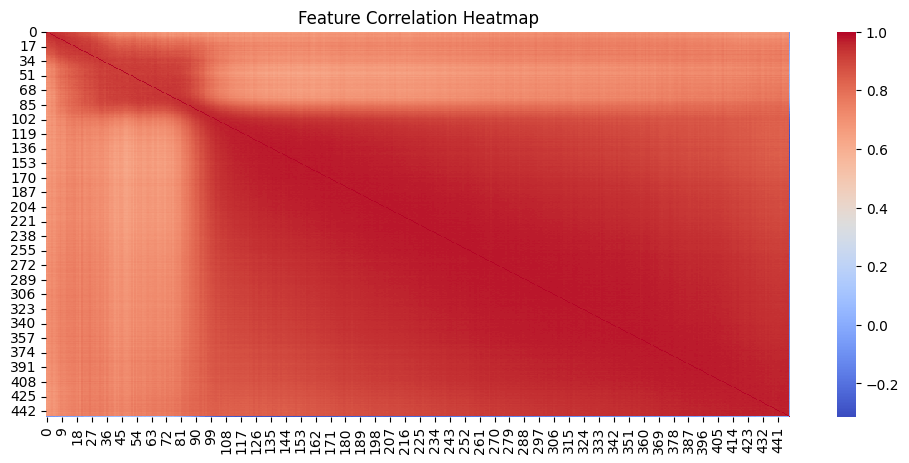

In [ ]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

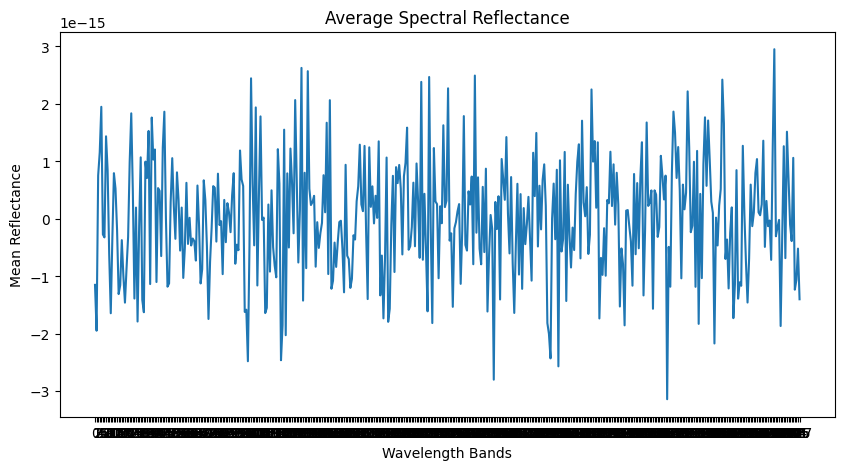

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.columns[1:-1], X_scaled.mean(axis=0))
plt.xlabel("Wavelength Bands")
plt.ylabel("Mean Reflectance")
plt.title("Average Spectral Reflectance")
plt.show()

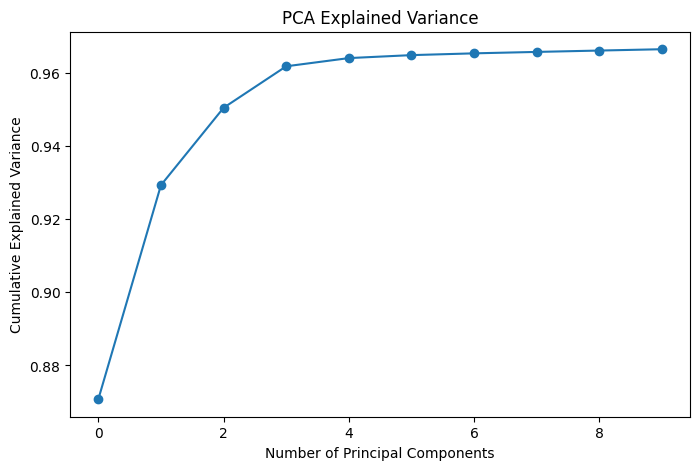

In [ ]:
## Dimensionality Reduction using PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Variance Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

In [ ]:
## Model Training & Evaluation
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}')

MAE: 2115.4655, RMSE: 5027.6196, R² Score: 0.9096


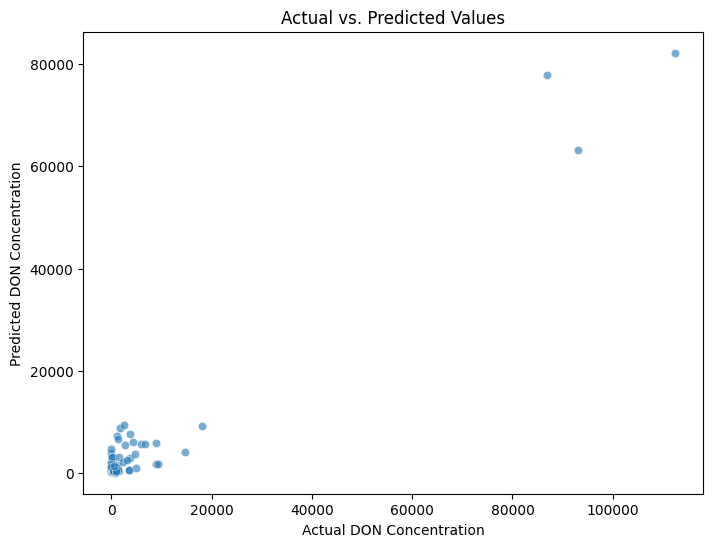

In [ ]:
## Visualization of Predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual DON Concentration')
plt.ylabel('Predicted DON Concentration')
plt.title('Actual vs. Predicted Values')
plt.show()